# Домашнее задание 3 - PANDAS
# Якунина Е. Н.

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных. С этой библиотекой мы сейчас и познакомимся.

Основной объект в pandas это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [1]:
%pylab inline  
# import almost all we need
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Данные можно скачать [отсюда](https://www.dropbox.com/s/5qq94wzmbw4e54r/data.csv?dl=0).

#### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [31]:
df = pd.read_csv('data.csv')
df.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


Данные представляют собой таблицу заказов. В таблице 4622 строки и 5 столбцов. Стобцы представляют информацию о номере заказа, количестве заказанных позиций, их наименованиях, описании выбранной позиции и цене наименования за указанное количество.

#### 2. [0.25 баллов] Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [33]:
print('Количество заказов в выборке:', len(df['order_id'].unique()), '\n'
      'Количество уникальных категорий товара:', len(df['item_name'].unique()))

Количество заказов в выборке: 1834 
Количество уникальных категорий товара: 50


#### 3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках? 

In [34]:
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

Пропуски данных есть в колонке choice_description

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [35]:
df['choice_description'].dtypes

dtype('O')

In [36]:
df.loc[df['choice_description'].isnull(), 'choice_description'] = ''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  4622 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [37]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


#### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [38]:
df.dtypes['item_price']

dtype('O')

In [39]:
def get_price(price):
    return price.split('$')[1]

In [40]:
prices = df['item_price'].apply(get_price)
df['item_price_'] = pd.to_numeric(prices)
df.dtypes['item_price_']

dtype('float64')

Какая средняя/минимальная/максимальная цена у товара? 

In [41]:
div_1 = pd.DataFrame(df.loc[:, 'item_price_'])
div_2 = df.loc[:, 'quantity']
pr = div_1.div(div_2, axis = 0)

df.loc[:, 'price_per_one'] = list(pr.loc[:, 'item_price_']) # добавлена колонка с ценой за 1 штуку товара

In [42]:
uniq_itemprice = df.drop_duplicates(['item_name', 'price_per_one']) # таблица с уникальными парами наименование/цена

In [43]:
print('Средняя цена:', uniq_itemprice['price_per_one'].mean(), '\n' 'Минимальная цена:', uniq_itemprice['price_per_one'].min(), 
      '\n' 'Максимальная цена:', uniq_itemprice['price_per_one'].max())

Средняя цена: 8.55870503597123 
Минимальная цена: 1.09 
Максимальная цена: 11.89


Удалите старую колонку с ценой.

In [44]:
df.drop('item_price', axis = 1, inplace = True)

In [45]:
df

,order_id,quantity,item_name,choice_description,item_price_,price_per_one
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


#### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [52]:
unique_lowprice = uniq_itemprice.sort_values(by = ['price_per_one'], ascending = True)
unique_lowprice.drop_duplicates(['item_name'], inplace = True)
unique_lowprice.set_index(np.arange(1, len(unique_lowprice) + 1), inplace = True)

unique_highprice = uniq_itemprice.sort_values(by = ['price_per_one'], ascending = False)
unique_highprice.drop_duplicates(['item_name'], inplace = True)
unique_highprice.set_index(np.arange(1, len(unique_highprice) + 1), inplace = True)

In [53]:
unique_lowprice.loc[5:6, :]

,order_id,quantity,item_name,choice_description,item_price,item_price_,price_per_one
5,1793,1,Chips,,$1.99,1.99,1.99
6,301,1,Chips and Fresh Tomato Salsa,,$2.29,2.29,2.29


In [54]:
unique_highprice.loc[5:6, :]

,order_id,quantity,item_name,choice_description,item_price,item_price_,price_per_one
5,413,1,Carnitas Crispy Tacos,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",$11.75,11.75,11.75
6,43,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.75,11.75,11.75


Больше, чем 5 товаров, могут быть отнесены к самым дорогим

In [55]:
res_high = unique_highprice[unique_highprice['price_per_one'] >= 11.75]

Самые дешевые товары

In [62]:
unique_lowprice.loc[:, ['item_name', 'price_per_one']].head()

,item_name,price_per_one
1,Canned Soda,1.09
2,Bottled Water,1.09
3,Canned Soft Drink,1.25
4,Side of Chips,1.69
5,Chips,1.99


Самые дорогие товары

In [63]:
res_high.loc[:, ['item_name', 'price_per_one']]

,item_name,price_per_one
1,Steak Salad Bowl,11.89
2,Barbacoa Salad Bowl,11.89
3,Carnitas Salad Bowl,11.89
4,Carnitas Burrito,11.75
5,Carnitas Crispy Tacos,11.75
6,Carnitas Bowl,11.75
7,Barbacoa Burrito,11.75
8,Barbacoa Crispy Tacos,11.75
9,Steak Crispy Tacos,11.75
10,Carnitas Soft Tacos,11.75


#### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [64]:
print('Клиенты покупали больше 1 Chicken Bowl', 
      len(df[(df['item_name'] == 'Chicken Bowl') & (df['quantity'] > 1)]), 'раза')

Клиенты покупали больше 1 Chicken Bowl 33 раза


#### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [65]:
sum_price = df.groupby('order_id')['item_price_'].sum() 

sum_items = df.groupby('order_id')['quantity'].sum()

print('Средний чек у заказа:', sum_price.mean(), '\n' 'Среднее число покупаемых товаров:', sum_items.mean())

Средний чек у заказа: 18.81142857142869 
Среднее число покупаемых товаров: 2.711014176663032


#### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [66]:
print(len(sum_items[sum_items == 1]), 'заказов содержали ровно 1 товар')

56 заказов содержали ровно 1 товар


#### 9. [0.25 баллов] Какая самая популярная категория товара? 

In [29]:
count_items = df.groupby('item_name')['quantity'].sum()
count_items.sort_values(ascending=False).head(2)

item_name
Chicken Bowl       761
Chicken Burrito    591
Name: quantity, dtype: int64

In [30]:
print('Самая популярная категория товара:', list(dict(count_items.sort_values(ascending=False).head(1)).keys()))

Самая популярная категория товара: ['Chicken Bowl']


#### 10. [0.5 баллов] Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой? 

In [69]:
burrito_types = df[df['item_name'].str.contains('Burrito') == True]

burrito_count = burrito_types.groupby('item_name')['quantity'].sum()

uniq_burritoprice = uniq_itemprice[uniq_itemprice['item_name'].str.contains('Burrito') == True]
uniq_burritoprice = uniq_burritoprice.sort_values(by = ['price_per_one'], ascending = False)

In [70]:
burrito_count.sort_values(ascending=False).head(2)

item_name
Chicken Burrito    591
Steak Burrito      386
Name: quantity, dtype: int64

In [71]:
uniq_burritoprice.head(2)

,order_id,quantity,item_name,choice_description,item_price,item_price_,price_per_one
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75,11.75,11.75
93,41,1,Carnitas Burrito,"[Roasted Chili Corn Salsa, [Sour Cream, Guacam...",$11.75,11.75,11.75


Более 1 Burrito являются самыми дорогими

In [79]:
bur_highprice = uniq_burritoprice[uniq_burritoprice['price_per_one'] == 11.75]

Виды Burrito

In [78]:
burrito_types.drop_duplicates('item_name').loc[:, 'item_name']

7         Steak Burrito
16      Chicken Burrito
21     Barbacoa Burrito
27     Carnitas Burrito
57       Veggie Burrito
510             Burrito
Name: item_name, dtype: object

In [82]:
print('Самый часто покупаемый вид Burrito:', list(dict(burrito_count.sort_values(ascending=False).head(1)).keys()))

Самый часто покупаемый вид Burrito: ['Chicken Burrito']


Самые дорогие Burrito

In [83]:
bur_highprice.loc[:, ['item_name', 'price_per_one']]

,item_name,price_per_one
7,Steak Burrito,11.75
93,Carnitas Burrito,11.75
130,Barbacoa Burrito,11.75


#### 11. [0.75 баллов] В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно среднюю стоимость заказа, добавить ее в исходные данные и сделать необходимые проверки.

*Данный комментарий стоит воспринимать как подсказку к одному из вариантов решений задания. Если в вашем варианте решения он не нужнен, это не страшно*

In [84]:
order_price_sum = df.groupby('order_id')['item_price_'].sum()
order_item_price_max = pd.DataFrame(df.groupby('order_id')['price_per_one'].max())
res = order_item_price_max.div(order_price_sum, axis = 0) * 100

print('Количество заказов, в которых есть товар, который стоит более 40% от суммы всего чека:', 
      len(res[res['price_per_one'] > 40]))

Количество заказов, в которых есть товар, который стоит более 40% от суммы всего чека: 1589


#### 12. [0.75 баллов] Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [85]:
df.loc[(df['choice_description'].str.contains('Diet Coke') == True) & (df['price_per_one'] == 1.25), 'price_per_one'] = 1.35
df['item_price_'] = df['price_per_one'].mul(df['quantity'], axis = 0)

diff = (1.35 / 1.25) * 100 - 100
print('Было заработано больше на', diff, 'процентов')

Было заработано больше на 8.0 процентов


#### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [86]:
data = np.random.random((10, 3))
columns = ['index', 'column1', 'column2']
data_fr = pd.DataFrame(data = data, columns = columns)
data_fr = data_fr.set_index('index')
data_fr

,column1,column2
index,,
0.113465,0.900381,0.203783
0.293346,0.193212,0.287224
0.220661,0.925521,0.088005
0.944351,0.688662,0.594454
0.579536,0.730773,0.388552
0.960965,0.710353,0.164316
0.276657,0.804262,0.403778
0.218151,0.202412,0.759919
0.001319,0.537250,0.298022


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [87]:
data_fr.to_csv('data_fr.csv', header=False, index=False)

## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- на графиках должны быть подписаны оси;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать.

In [88]:
%matplotlib inline 
import matplotlib.pyplot as plt

На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [89]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(df.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
df['date'] = df.order_id.map(dates['date'])

#### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

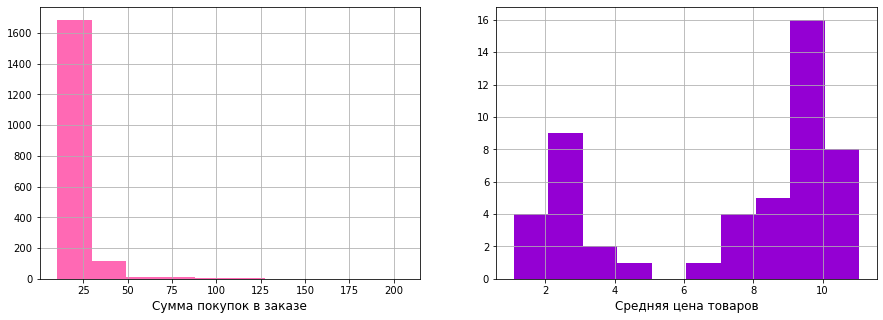

In [117]:
x_1 = df.groupby('order_id')['item_price_'].sum()

x_2 = df.groupby('item_name')['price_per_one'].mean()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist(x_1, color = 'hotpink')
ax[1].hist(x_2, color = 'darkviolet')
ax[0].set_xlabel('Сумма покупок в заказе', fontsize=12)
ax[1].set_xlabel('Средняя цена товаров', fontsize=12)
ax[0].grid()
ax[1].grid()

#### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

In [91]:
def get_day(date):
    return date.split('-')[2]

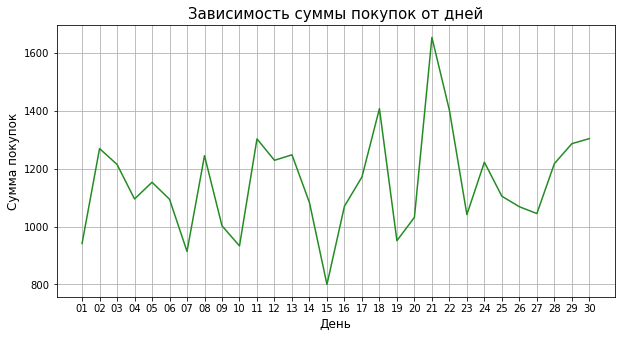

In [114]:
df_dates_sort = df.sort_values(by = ['date'], ascending = True)
dates_unique = pd.DataFrame({'date': df_dates_sort['date'].unique()})

x = np.array(dates_unique['date'].apply(get_day))
y = np.array(df_dates_sort.groupby('date')['item_price_'].sum())

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(x, y, color = 'forestgreen')
ax.set_xlabel('День', fontsize=12)
ax.set_ylabel('Сумма покупок', fontsize=12)
plt.title('Зависимость суммы покупок от дней', fontsize=15)
ax.grid()

#### 3. [1 балл] Постройте средних сумм покупок по дням недели (bar plot).

In [94]:
tabl = pd.DataFrame({'date': df_dates_sort['date'].unique(), 'sum_price': df_dates_sort.groupby('date')['item_price_'].sum()})

tabl['date'] = pd.to_datetime(tabl['date'])
tabl['weekday'] = tabl['date'].dt.day_name()

In [96]:
wkd = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
tabl['Weekday'] = pd.Categorical(tabl['weekday'],categories=wkd)
tabl = tabl.sort_values('Weekday')

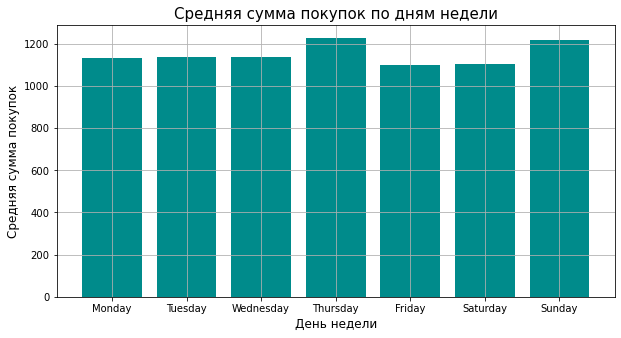

In [112]:
mean_price = list(tabl.groupby('Weekday')['sum_price'].mean())
wkds = list(tabl.drop_duplicates(subset = ['Weekday'])['Weekday'])

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(wkds, mean_price, color = 'darkcyan')
ax.set_xlabel('День недели', fontsize=12)
ax.set_ylabel('Средняя сумма покупок', fontsize=12)
plt.title('Средняя сумма покупок по дням недели', fontsize=15)
ax.grid()

#### 4. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot).

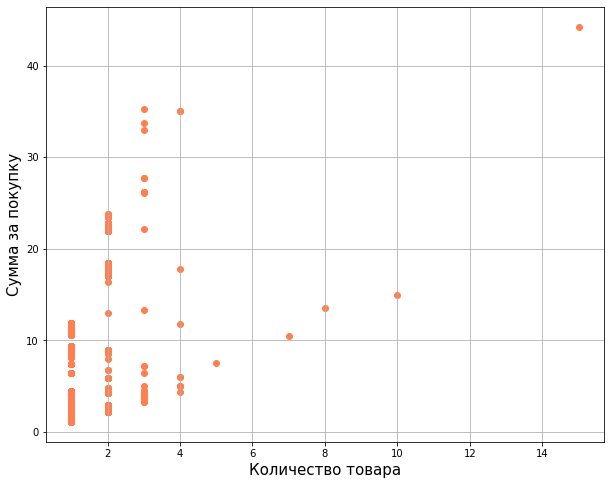

In [120]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(df['quantity'], df['item_price_'], color = 'coral')
ax.set_xlabel('Количество товара', fontsize=15)
ax.set_ylabel('Сумма за покупку', fontsize=15)
ax.grid()

Сохраните график в формате pdf (так он останется векторизованным).

In [119]:
fig.savefig("graph.pdf")

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 